In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

# initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []
print("hello1")
# load image files from the dataset
image_files = [f for f in glob.glob(r'gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)
print("hello2")
# converting images to arrays and labelling the categories



hello1
hello2


In [2]:
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]
print("hello3")


hello3


In [3]:
# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")
print("hello4")


hello4


In [4]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model
print("hello5")


hello5


In [6]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)
import tensorflow as tf

print("hello6")
# compile the model
initial_learning_rate = lr
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=len(trainX) // batch_size, decay_rate=0.9, staircase=True
)
opt = Adam(learning_rate=lr_schedule)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
print("hello7")


hello6
hello7


In [7]:
# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)
print("hello3")
# save the model to disk


C:\Users\USER\AppData\Local\Temp\ipykernel_10164\2240861740.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/100


339/339 [==============================] - 251s 723ms/step - loss: 0.5579 - accuracy: 0.7570 - val_loss: 0.9894 - val_accuracy: 0.4733
Epoch 2/100
339/339 [==============================] - 217s 639ms/step - loss: 0.4324 - accuracy: 0.8071 - val_loss: 0.3932 - val_accuracy: 0.8130
Epoch 3/100
339/339 [==============================] - 222s 654ms/step - loss: 0.3836 - accuracy: 0.8282 - val_loss: 0.6957 - val_accuracy: 0.7278
Epoch 4/100
339/339 [==============================] - 218s 643ms/step - loss: 0.3412 - accuracy: 0.8512 - val_loss: 0.3354 - val_accuracy: 0.8590
Epoch 5/100
339/339 [==============================] - 220s 650ms/step - loss: 0.2900 - accuracy: 0.8757 - val_loss: 0.2612 - val_accuracy: 0.8855
Epoch 6/100
339/339 [==============================] - 214s 631ms/step - loss: 0.2717 - accuracy: 0.8850 - val_loss: 0.2609 - val_accuracy: 0.8986
Epoch 7/100
339/339 [==============================] - 215s 633ms/step - loss: 0.2673 - accuracy: 0.8877 - val_loss:

In [8]:
model.save('gender_detection1.model')
# plot training/validation loss/accuracy
print("done")

INFO:tensorflow:Assets written to: gender_detection1.model\assets


INFO:tensorflow:Assets written to: gender_detection1.model\assets


done


hello4
hello5


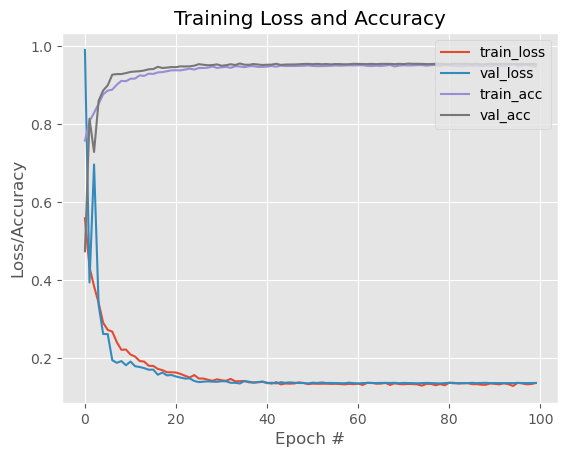

In [10]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")


plt.title("Training Loss and Accuracy") 
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')


In [2]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

model = load_model('gender_detection1.model')

webcam = cv2.VideoCapture(0)
    
classes = ['man','woman']

while webcam.isOpened():

    status, frame = webcam.read()

    face, confidence = cv.detect_face(frame)

    for idx, f in enumerate(face):
     
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        conf = model.predict(face_crop)[0]

        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)

    cv2.imshow("gender detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
webcam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 73ms/step


KeyboardInterrupt: 